In [77]:
import pandas as pd
import xarray as xr
from premise import *
from datapackage import Package
import brightway2 as bw
bw.projects.set_current("new")

In [78]:
years = [
    2005,
    2010,
    2015,
    2020,
    2025,
    2030,
    2035,
    2040,
    2045,
    2050,
    2060,
    2070,
    2080,
    2090,
    2100,
]
scenarios = [
    {"model": "image", "pathway":"SSP2-Base", "year": y}
    for y in years
]

ndb = NewDatabase(
        scenarios = scenarios,        
        source_db="ecoinvent 3.8 cutoff",
        source_version="3.8",
        key='tUePmX_S5B8ieZkkM7WUU2CnO8SmShwmAeWK9x2rTFo=',
        #external_scenarios=[Package(url) for url in urls]
)

premise v.(1, 4, 1)
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
| It also provides factors for hydrogen emissions to air.          |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+------------------------------------------------------------------+
+-------------

In [79]:
ndb.update_all()
ndb.update_buses()
ndb.update_cars()

`update_all()` will skip the following steps:
update_two_wheelers(), update_cars(), and update_buses()
If you want to update these steps, please run them separately afterwards.

////////////////// MEDIUM AND HEAVY DUTY TRUCKS ////////////////////
Extracted 1 worksheets in 12.87 seconds
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Create fleet average vehicles...
Vehicle fleet data is not available before 2015. Hence, 2015 is used as fleet year.
Done!
Extracted 1 worksheets in 3.34 seconds
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Create fleet average vehicles...
Vehicle fleet data is not available before 2015. Hence, 2015 is used as fleet year.
Done!
Extracted 1 worksheets in 3.34 seconds
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Create fleet average vehicles...
Done!
Extracted 1 worksheets in 3.37 seconds
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Create fleet averag

In [80]:
ndb.write_db_to_matrices()

Write new database(s) to matrix.
Prepare database 1.
- check for duplicates...
- check for values format...
- relinking exchanges...
Done!
Matrices saved in /Users/romain/GitHub/premise/premise/data/export/image/SSP2-Base/2005.
Prepare database 2.
- check for duplicates...
- check for values format...
- relinking exchanges...
Done!
Matrices saved in /Users/romain/GitHub/premise/premise/data/export/image/SSP2-Base/2010.
Prepare database 3.
- check for duplicates...
- check for values format...
- relinking exchanges...
Done!
Matrices saved in /Users/romain/GitHub/premise/premise/data/export/image/SSP2-Base/2015.
Prepare database 4.
- check for duplicates...
- check for values format...
- relinking exchanges...
Done!
Matrices saved in /Users/romain/GitHub/premise/premise/data/export/image/SSP2-Base/2020.
Prepare database 5.
- check for duplicates...
- check for values format...
- relinking exchanges...
Done!
Matrices saved in /Users/romain/GitHub/premise/premise/data/export/image/SSP2-Bas

In [10]:
from premise.scenario_report import *
from premise import *
from premise.activity_maps import InventorySet
from datapackage import Package
import brightway2 as bw
bw.projects.set_current("new")
years = [
    2005,
]
scenarios = [
    {"model": "image", "pathway":"SSP2-Base", "year": y}
    for y in years
]

ndb = NewDatabase(
        scenarios = scenarios,        
        source_db="ecoinvent 3.8 cutoff",
        source_version="3.8",
        key='tUePmX_S5B8ieZkkM7WUU2CnO8SmShwmAeWK9x2rTFo=',
        #external_scenarios=[Package(url) for url in urls]
)

inv = InventorySet(ndb.scenarios[0]["database"])

premise v.(1, 4, 1)
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
| It also provides factors for hydrogen emissions to air.          |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+------------------------------------------------------------------+
+-------------

In [81]:
# the directory to the set o.production_volumes files produced by premise
iam_model = "image"
scenario = "SSP2-Base"
years = [
    2005,
    2010,
    2015,
    2020,
    2025,
    2030,
    2035,
    2040,
    2045,
    2050,
    2060,
    2070,
    2080,
    2090,
    2100,
]

elec_vars = [
    'Biomass CHP', 'Biomass CHP CCS', 'Biomass ST', 'Biomass IGCC CCS',
    'Biomass IGCC', 'Coal PC', 'Coal IGCC', 'Coal IGCC CCS', 'Coal CHP',
    'Coal CHP CCS', 'Gas OC', 'Gas CC', 'Gas CHP', 'Gas CHP CCS',
    'Gas CC CCS', 'Geothermal', 'Hydro', 'Nuclear', 'Oil ST', 'Oil CC',
    'Oil CC CCS', 'Oil CHP', 'Oil CHP CCS', 'Solar CSP',
    'Solar PV Centralized', 'Solar PV Residential', 'Wind Onshore',
    'Wind Offshore'
]

metals = [
    "Dysprosium",
    "Neodymium",
    "Nickel",
    "Manganese",
    "Yttrium",
    "Vanadium",
    "Cobalt",
    "Lithium",
    "Sulfur",
    "Platinum",
    "Cerium",
    "Lanthanum",
    "Zirconium",
    "Gadolinium",
    "Scandium",
    "Strontium",
    "Potassium",
    "Iridium",
    "Silver",
    "Germanium",
    "Indium",
    "Gallium",
    "Selenium",
    "Cadmium",
    "Tellurium",
    "Copper",
    "Manganese",
    "Nickel"
]

In [82]:
from csv import reader
import numpy as np
from scipy import sparse
import scipy.sparse.linalg as sp


results = []

for year in years:
    print(year)
    DIR = Path(f"../premise/data/export/{iam_model}/{scenario}/{year}") 

    # creates dict of activities <--> indices in A matrix
    A_inds = dict()
    with open(DIR / "A_matrix_index.csv", 'r') as read_obj:
        csv_reader = reader(read_obj, delimiter=";")
        for row in csv_reader:
            A_inds[(row[0], row[1], row[2], row[3])] = row[4]
    A_inds_rev = {int(v):k for k, v in A_inds.items()}

    # creates dict of bio flow <--> indices in B matrix
    B_inds = dict()
    with open(DIR / "B_matrix_index.csv", 'r') as read_obj:
        csv_reader = reader(read_obj, delimiter=";")
        for row in csv_reader:
            B_inds[(row[0], row[1], row[2], row[3])] = row[4]
    B_inds_rev = {int(v):k for k, v in B_inds.items()}

    # create a sparse A matrix
    A_coords = np.genfromtxt(DIR / "A_matrix.csv", delimiter=";", skip_header=1)
    I = A_coords[:, 0].astype(int)
    J = A_coords[:, 1].astype(int)
    A = sparse.csr_matrix((A_coords[:,2], (J, I)))

    # create a sparse B matrix
    B_coords = np.genfromtxt(DIR / "B_matrix.csv", delimiter=";", skip_header=1)
    I = B_coords[:, 0].astype(int)
    J = B_coords[:, 1].astype(int)
    B = sparse.csr_matrix((B_coords[:,2] * -1, (I, J)), shape=(A.shape[0], len(B_inds)))
    
    metals_ids = [int(B_inds[b]) for b in B_inds if any(m in b[0] for m in metals) and b[1] == "natural resource"]
    
    
    regions = [r for r in ndb.scenarios[0]["iam data"].production_volumes.region.values if r!="World"]
    for region in ndb.scenarios[0]["iam data"].production_volumes.region.values:
        conversion_EJ_to_kWh = 2.778e+11
        elec_prod = ndb.scenarios[0]["iam data"].production_volumes.sel(variables=elec_vars, region=region, year=year).sum().values * conversion_EJ_to_kWh

        act_id = ("market group for electricity, low voltage", "electricity, low voltage", "kilowatt hour", region)
        f = np.float64(np.zeros(A.shape[0]))
        f[int(A_inds[act_id])] = elec_prod
        A_inv = sp.spsolve(A, f)
        C = A_inv * B
        results.append([year, region, act_id[0], elec_prod] + C[metals_ids].tolist())

2005
2010
2015
2020
2025
2030
2035
2040
2045
2050
2060
2070
2080
2090
2100


In [144]:
import pandas as pd
df = pd.DataFrame(
    results, columns=["year", "region", "product", "quantity"] + [B_inds_rev[m][0] for m in metals_ids])

In [145]:
df.to_excel(f"metals_{iam_model}_{scenario}.xlsx")

In [146]:
df.columns = [c.replace(", in ground", "") for c in df.columns]
df.columns = [c.split(", ")[0] for c in df.columns]

In [147]:
df = df.groupby(lambda x:x, axis=1).sum()

In [148]:
df.loc[:, : "Zirconium"] /= (1e3 * 1e6) # kilograms to million tons

In [149]:
df = df.loc[df["region"]!="World"]

In [150]:
df.columns

Index(['Cadmium', 'Cerium', 'Cobalt', 'Copper', 'Dysprosium', 'Gadolinium',
       'Gallium', 'Germanium', 'Indium', 'Iridium', 'Lanthanum', 'Lithium',
       'Manganese', 'Neodymium', 'Nickel', 'Platinum', 'Potassium', 'Scandium',
       'Selenium', 'Silver', 'Strontium', 'Sulfur', 'Tellurium', 'Vanadium',
       'Yttrium', 'Zirconium', 'product', 'quantity', 'region', 'year'],
      dtype='object')

<AxesSubplot:xlabel='year'>

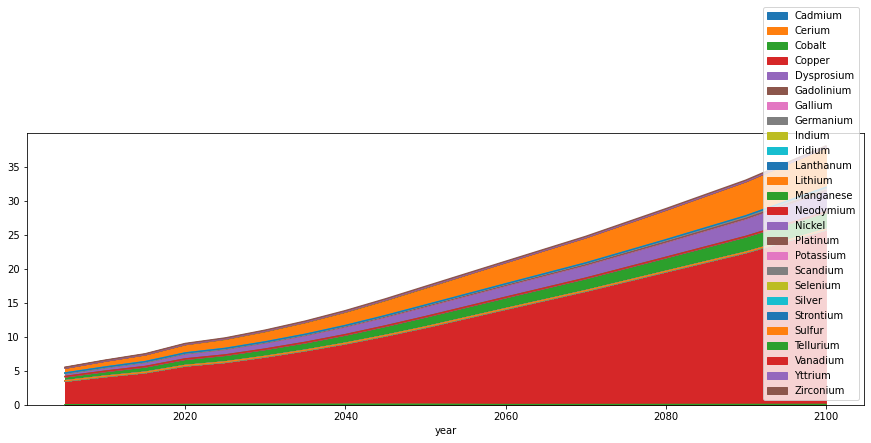

In [151]:
df.drop(["product", "quantity"], axis=1).groupby(["year"]).sum().plot(kind="area", stacked=True, figsize=(15, 5))

<AxesSubplot:xlabel='year'>

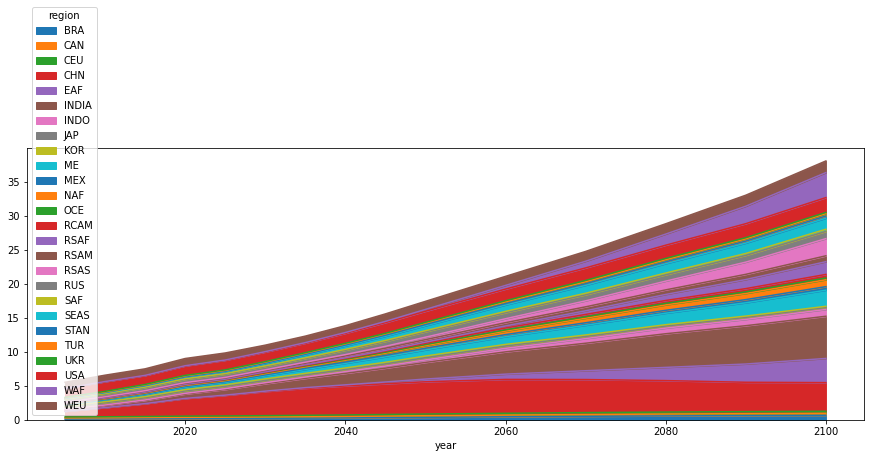

In [156]:
df.drop(["product", "quantity"], axis=1).melt(
    id_vars=["region", "year"]
).groupby(["region", "year"]).sum().unstack()["value"].T.plot(kind="area", stacked=True, figsize=(15, 5))

In [119]:
df.to_excel(f"metals_{iam_model}_{scenario}.xlsx")